In [74]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("2012-2013-data-with-predictions-4-final.csv")

In [6]:
df.head()

,problem_log_id,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,...,overlap_time,template_id,answer_id,answer_text,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
0,137792159,NaN,557460,61394,565736,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,choose_1,1,...,9852,341511,NaN,she,0,137792159,0.361323,0.0,0.336529,0.000000
1,138083797,Rounding,365981,61394,573819,204043,2012-10-09 11:01:52,2012-10-09 11:02:13.182,algebra,1,...,21175,204043,NaN,74.29,0,138083797,0.361323,0.0,0.766925,0.000000
2,142332619,Multiplication and Division Integers,426415,61394,734130,247525,2013-03-07 10:53:20,2013-03-07 10:53:28.661,algebra,1,...,8645,247525,NaN,00,0,142332619,0.361323,0.0,0.766925,0.442968
3,145939397,Proportion,86686,61394,821352,48081,2013-08-20 19:54:56,2013-08-20 19:55:21.753,algebra,1,...,25728,46362,NaN,3.8,0,145939397,0.775000,0.0,0.766925,0.912281
4,137111284,NaN,399669,76592,557216,227869,2012-09-10 17:20:10,2012-09-10 17:24:56.579,choose_1,1,...,286578,227869,NaN,C (wr - 1)(wr + 1),0,137111284,0.361323,0.0,0.766925,0.000000


In [8]:
df.describe()

,problem_log_id,problem_id,user_id,assignment_id,assistment_id,original,correct,bottom_hint,hint_count,attempt_count,...,school_id,overlap_time,template_id,answer_id,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
count,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.062922e+06,6.123270e+06,6.123270e+06,...,6.123113e+06,6.123270e+06,6.123270e+06,8.275000e+03,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06
mean,1.414932e+08,3.685675e+05,1.770492e+05,6.773074e+05,2.202825e+05,9.504296e-01,6.768206e-01,1.200497e-01,3.373479e-01,1.339212e+00,...,6.925225e+03,4.907237e+04,2.088952e+05,4.324879e+05,6.151860e-02,1.414932e+08,3.894586e-01,4.479487e-02,6.823843e-01,2.567723e-01
std,2.693733e+06,2.195421e+05,3.172431e+04,9.425983e+04,1.393519e+05,2.170557e-01,4.674909e-01,3.250197e-01,9.851956e-01,1.056276e+00,...,3.314489e+03,2.884992e+05,1.458227e+05,3.534885e+05,2.635170e-01,2.693733e+06,1.027662e-01,1.924793e-01,1.713734e-01,2.862460e-01
min,1.368431e+08,1.000000e+00,2.142100e+04,1.814560e+05,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,-6.767000e+03,5.000000e+00,1.000000e+00,0.000000e+00,1.368431e+08,3.613230e-01,0.000000e+00,1.707320e-01,0.000000e+00
25%,1.391705e+08,1.284030e+05,1.719780e+05,5.863570e+05,6.883725e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,5.260000e+03,9.468000e+03,5.259000e+04,1.060495e+05,0.000000e+00,1.391705e+08,3.613230e-01,0.000000e+00,7.669250e-01,0.000000e+00
50%,1.414916e+08,4.168130e+05,1.791670e+05,6.785645e+05,2.399180e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,5.978000e+03,2.241500e+04,2.395460e+05,3.442820e+05,0.000000e+00,1.414916e+08,3.613230e-01,0.000000e+00,7.669250e-01,2.214840e-01
75%,1.438272e+08,5.644030e+05,1.972510e+05,7.672320e+05,3.466830e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,9.394000e+03,5.505400e+04,3.434800e+05,7.385615e+05,0.000000e+00,1.438272e+08,3.613230e-01,0.000000e+00,7.669250e-01,4.429680e-01
max,1.462357e+08,7.671430e+05,2.282130e+05,8.330540e+05,4.925890e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,2.900000e+01,...,1.242800e+04,3.452775e+08,4.925890e+05,1.184706e+06,2.000000e+00,1.462357e+08,8.671330e-01,1.000000e+00,7.669250e-01,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123270 entries, 0 to 6123269
Data columns (total 35 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   problem_log_id                     int64  
 1   skill                              object 
 2   problem_id                         int64  
 3   user_id                            int64  
 4   assignment_id                      int64  
 5   assistment_id                      int64  
 6   start_time                         object 
 7   end_time                           object 
 8   problem_type                       object 
 9   original                           int64  
 10  correct                            float64
 11  bottom_hint                        float64
 12  hint_count                         int64  
 13  actions                            object 
 14  attempt_count                      int64  
 15  ms_first_response                  int64  
 16  tutor_mode        

In [34]:
df['correct'].sort_values()

3652261    0.0
1571821    0.0
5060295    0.0
5060296    0.0
5060297    0.0
          ... 
2435597    1.0
2435596    1.0
2435595    1.0
2435593    1.0
6123269    1.0
Name: correct, Length: 6123270, dtype: float64

In [14]:
# Check missing/null values in each column
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display
print("Columns with missing values:\n")
print(missing_values.sort_values(ascending=False))

Columns with missing values:

answer_id      6114995
skill          3493190
skill_id       3411457
answer_text     346500
bottom_hint      60348
school_id          157
dtype: int64


In [20]:
df[['answer_id', 'skill', 'skill_id', 'answer_text', 'bottom_hint', 'school_id']]

,answer_id,skill,skill_id,answer_text,bottom_hint,school_id
0,NaN,NaN,NaN,she,0.0,5048.0
1,NaN,Rounding,54.0,74.29,0.0,5048.0
2,NaN,Multiplication and Division Integers,279.0,00,0.0,5048.0
3,NaN,Proportion,79.0,3.8,0.0,5048.0
4,NaN,NaN,NaN,C (wr - 1)(wr + 1),0.0,7561.0
...,...,...,...,...,...,...
6123265,NaN,NaN,NaN,yes,0.0,6205.0
6123266,NaN,NaN,NaN,Biotic factors in a forest,0.0,11779.0
6123267,NaN,Addition and Subtraction Integers,277.0,-19,0.0,12406.0
6123268,NaN,NaN,NaN,Yes,0.0,6168.0


In [28]:
df[df['tutor_mode']!='tutor']['tutor_mode']

3030       test
5644       test
19309      test
29579      test
29628      test
           ... 
6105144    test
6105155    test
6108230    test
6116919    test
6117189    test
Name: tutor_mode, Length: 2272, dtype: object

In [18]:
columns_with_missing = ['answer_id', 'skill', 'skill_id', 'answer_text', 'bottom_hint', 'school_id']

for col in columns_with_missing:
    print(f"\nColumn: {col}")
    print("-" * 40)
    print("Unique values:", df[col].nunique())
    print("Sample values:")
    print(df[col].dropna().unique()[:5])  # Just showing first 5 unique non-null values
    print("Missing count:", df[col].isnull().sum())


Column: answer_id
----------------------------------------
Unique values: 3816
Sample values:
[  57641.  495318.  214815. 1133329.  943894.]
Missing count: 6114995

Column: skill
----------------------------------------
Unique values: 198
Sample values:
['Rounding' 'Multiplication and Division Integers' 'Proportion'
 'Exponents' 'Equation Solving Two or Fewer Steps']
Missing count: 3493190

Column: skill_id
----------------------------------------
Unique values: 265
Sample values:
[ 54. 279.  79.  86. 311.]
Missing count: 3411457

Column: answer_text
----------------------------------------
Unique values: 224738
Sample values:
['she' '74.29' '00' '3.8' 'C (wr - 1)(wr + 1)']
Missing count: 346500

Column: bottom_hint
----------------------------------------
Unique values: 2
Sample values:
[0. 1.]
Missing count: 60348

Column: school_id
----------------------------------------
Unique values: 661
Sample values:
[5048. 7561. 4986. 5056.   76.]
Missing count: 157


In [38]:
missing_summary = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_summary[missing_summary > 0])

Missing values in each column:

skill          3493190
bottom_hint      60348
school_id          157
dtype: int64


In [40]:
# Drop high-sparsity or low-utility columns
df.drop(columns=['answer_id', 'answer_text'], inplace=True)

# Optional: Drop 'skill_id' if you're keeping 'skill' for bias testing
df.drop(columns=['skill_id'], inplace=True)

KeyError: "['answer_id', 'answer_text'] not found in axis"

In [42]:
missing_summary = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_summary[missing_summary > 0])

Missing values in each column:

skill          3493190
bottom_hint      60348
school_id          157
dtype: int64


In [44]:
# ----- Dataset 1: Full dataset (drop 'skill', clean bottom_hint + school_id) -----
df_full = df.drop(columns=['skill']).copy()  # Drop the sparse 'skill' column
df_full.dropna(subset=['bottom_hint', 'school_id'], inplace=True)

print("Shape of full dataset without 'skill':", df_full.shape)

# ----- Dataset 2: Subset with 'skill' available and no missing key values -----
df_with_skill = df.dropna(subset=['skill', 'bottom_hint', 'school_id']).copy()

print("Shape of dataset with skill included:", df_with_skill.shape)

Shape of full dataset without 'skill': (6062765, 31)
Shape of dataset with skill included: (2588323, 32)


In [48]:
missing_summary = df_full.isnull().sum()
print("Missing values in each column:\n")
print(missing_summary[missing_summary > 0])

Missing values in each column:

Series([], dtype: int64)


In [50]:
missing_summary = df_with_skill.isnull().sum()
print("Missing values in each column:\n")
print(missing_summary[missing_summary > 0])

Missing values in each column:

Series([], dtype: int64)


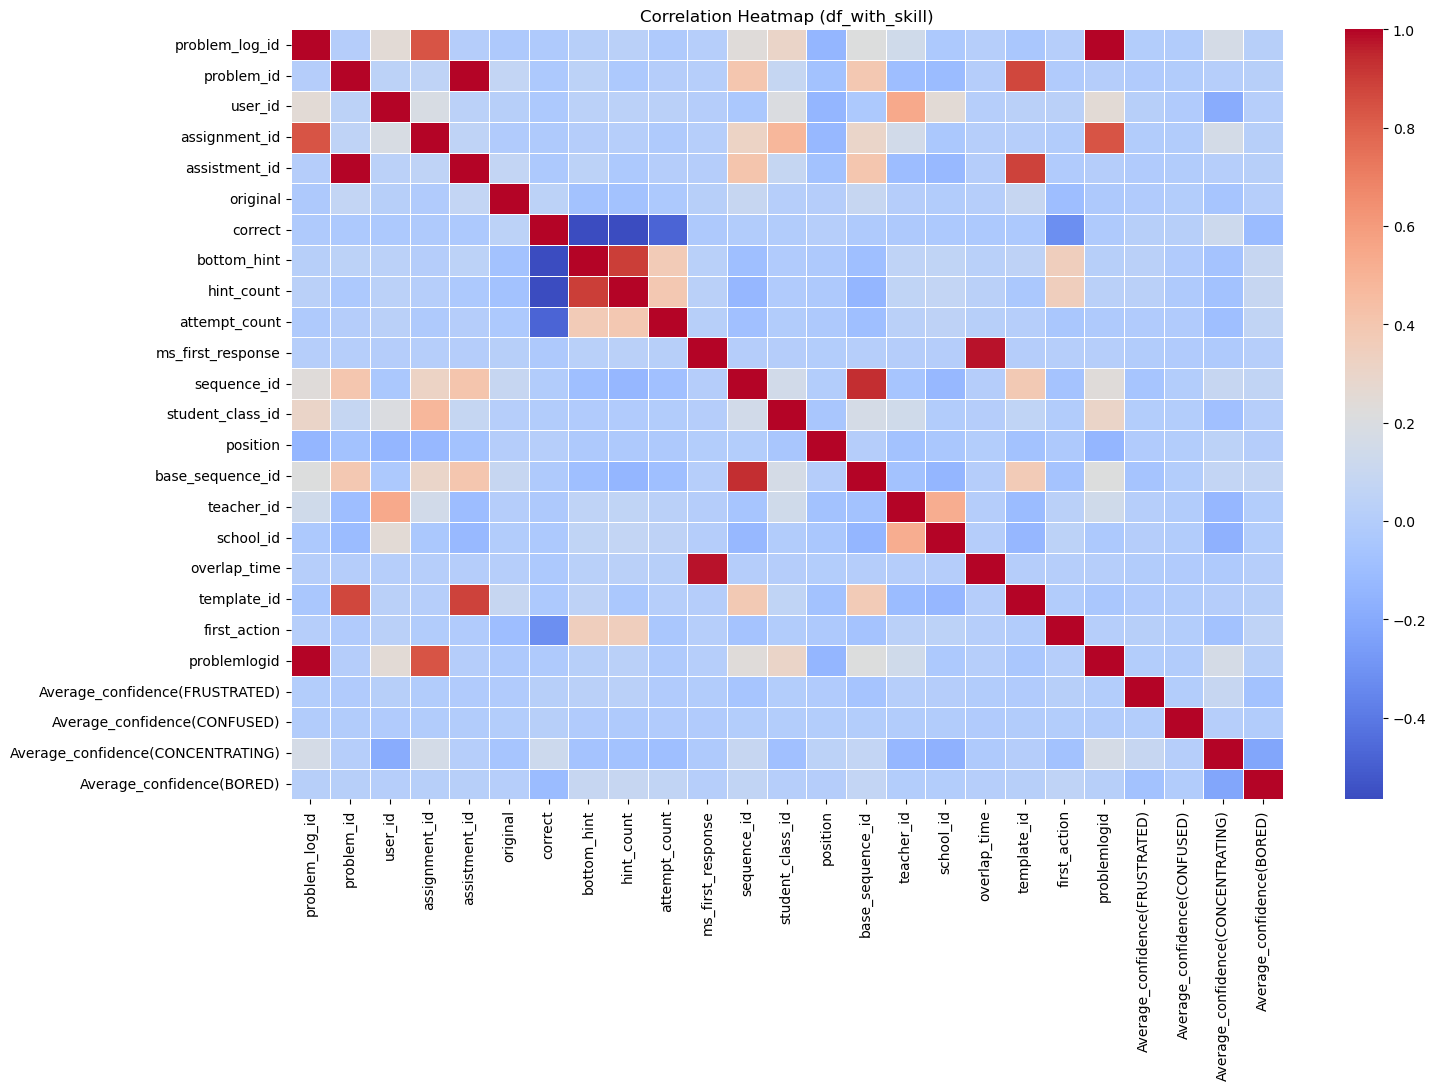

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df_with_skill.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (df_with_skill)")
plt.show()

In [64]:
# Compute correlation matrix
corr_matrix = df_with_skill.select_dtypes(include=['int64', 'float64']).corr()

# Unstack the matrix into a long format
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Drop duplicate pairs (A-B and B-A)
corr_pairs['Pairs'] = corr_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

# Filter only meaningful correlations (absolute > 0.3)
significant_corrs = corr_pairs[abs(corr_pairs['Correlation']) > 0.3].sort_values(by='Correlation', ascending=False)

# Show top correlations
significant_corrs.head(60)

,Feature 1,Feature 2,Correlation
199,ms_first_response,overlap_time,0.979507
219,sequence_id,base_sequence_id,0.936114
121,bottom_hint,hint_count,0.898909
62,assistment_id,template_id,0.885537
41,assignment_id,problemlogid,0.835692
13,user_id,teacher_id,0.544884
313,teacher_id,school_id,0.523541
33,assignment_id,student_class_id,0.482608
55,assistment_id,sequence_id,0.411222
58,assistment_id,base_sequence_id,0.403625


In [60]:
df_with_skill.drop(columns=['problem_id', 'problem_log_id'], inplace=True)

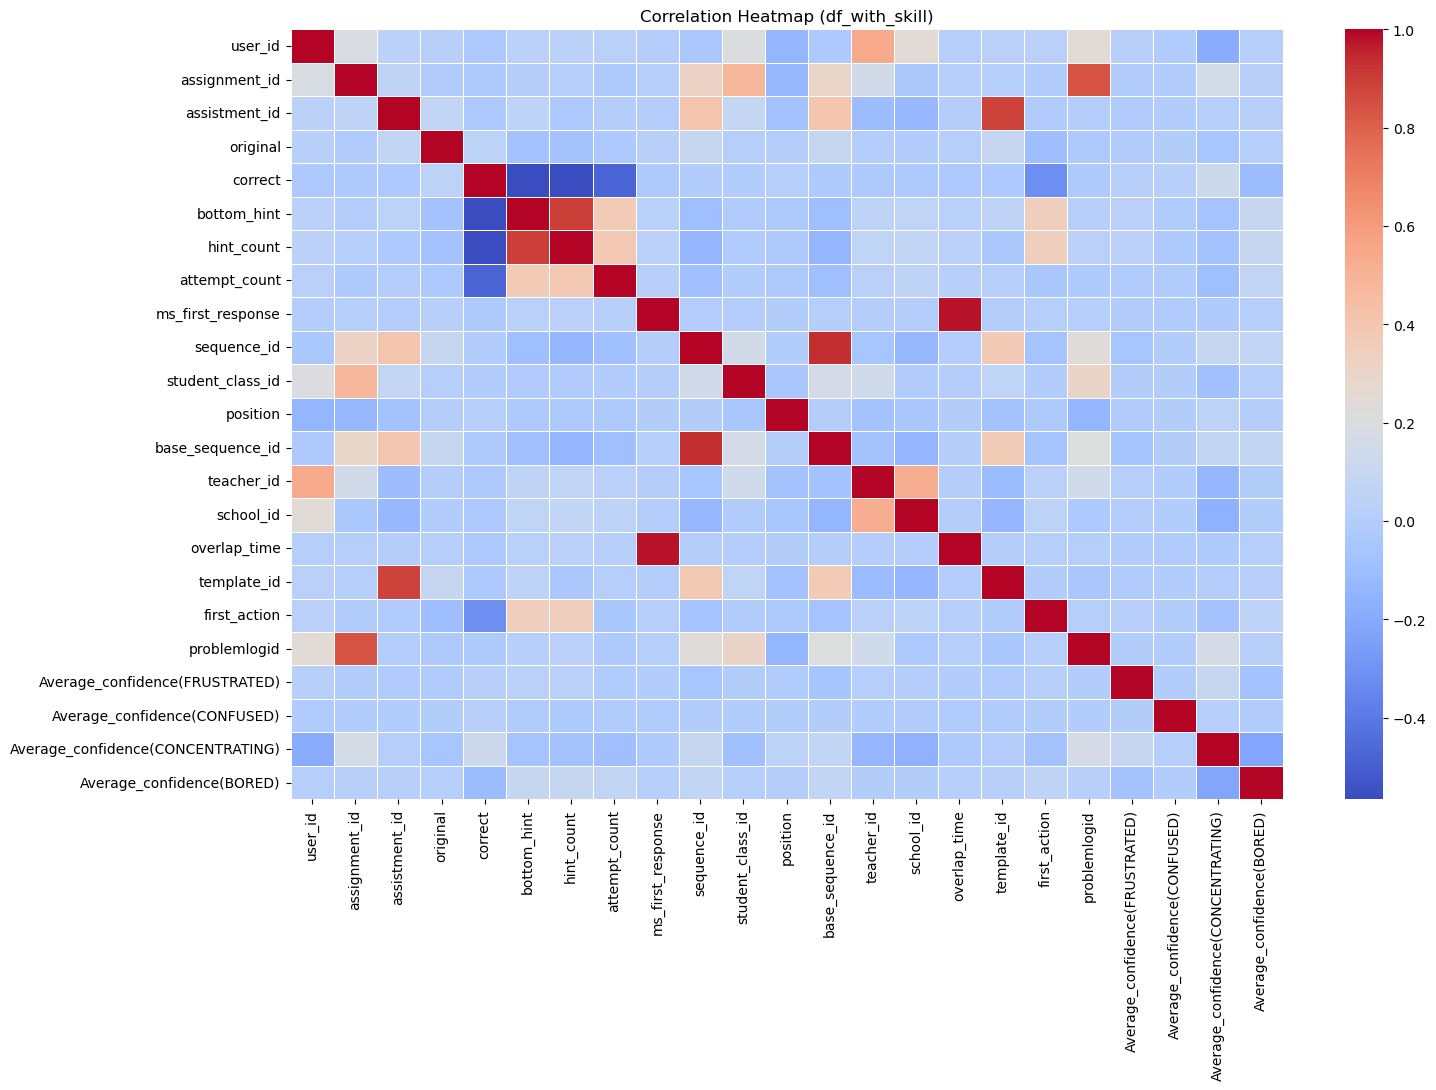

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df_with_skill.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (df_with_skill)")
plt.show()

In [66]:
df_with_skill.drop(columns=[
    'base_sequence_id',    # Drop over sequence_id
    'template_id',         # Drop over assistment_id
    'hint_count',          # Drop over bottom_hint (or vice versa)
], inplace=True)

In [68]:
# Compute correlation matrix
corr_matrix = df_with_skill.select_dtypes(include=['int64', 'float64']).corr()

# Unstack the matrix into a long format
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Drop duplicate pairs (A-B and B-A)
corr_pairs['Pairs'] = corr_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

# Filter only meaningful correlations (absolute > 0.3)
significant_corrs = corr_pairs[abs(corr_pairs['Correlation']) > 0.3].sort_values(by='Correlation', ascending=False)

# Show top correlations
significant_corrs.head(60)

,Feature 1,Feature 2,Correlation
153,ms_first_response,overlap_time,0.979507
35,assignment_id,problemlogid,0.835692
11,user_id,teacher_id,0.544884
232,teacher_id,school_id,0.523541
29,assignment_id,student_class_id,0.482608
48,assistment_id,sequence_id,0.411222
106,bottom_hint,attempt_count,0.372556
114,bottom_hint,first_action,0.348115
28,assignment_id,sequence_id,0.319164
195,student_class_id,problemlogid,0.308137


In [84]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Define privileged and unprivileged groups
most_common_school = df_with_skill['school_id'].mode()[0]
privileged_group = [{'school_id': most_common_school}]
unprivileged_group = [{'school_id': sid} for sid in df_with_skill['school_id'].unique() if sid != most_common_school]

# Create the dataset
dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['school_id']
)

# Bias metrics
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (school_id):", metric.disparate_impact())
print("Statistical Parity Difference (school_id):", metric.statistical_parity_difference())

ValueError: could not convert string to float: '2012-10-09 11:01:52'


ValueError: DataFrame values must be numerical.

In [78]:
df_with_skill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2588323 entries, 1 to 6123267
Data columns (total 27 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   skill                              object 
 1   user_id                            int64  
 2   assignment_id                      int64  
 3   assistment_id                      int64  
 4   start_time                         object 
 5   end_time                           object 
 6   problem_type                       object 
 7   original                           int64  
 8   correct                            float64
 9   bottom_hint                        float64
 10  actions                            object 
 11  attempt_count                      int64  
 12  ms_first_response                  int64  
 13  tutor_mode                         object 
 14  sequence_id                        int64  
 15  student_class_id                   int64  
 16  position               

In [80]:
from sklearn.preprocessing import LabelEncoder

# Encode 'skill' to numeric values
le = LabelEncoder()
df_with_skill['skill'] = le.fit_transform(df_with_skill['skill'])

In [82]:
# Confirm all columns are now numeric
print(df_with_skill.dtypes)

skill                                  int64
user_id                                int64
assignment_id                          int64
assistment_id                          int64
start_time                            object
end_time                              object
problem_type                          object
original                               int64
correct                              float64
bottom_hint                          float64
actions                               object
attempt_count                          int64
ms_first_response                      int64
tutor_mode                            object
sequence_id                            int64
student_class_id                       int64
position                               int64
type                                  object
teacher_id                             int64
school_id                            float64
overlap_time                           int64
first_action                           int64
problemlog

In [98]:
df['type'].sort_values()

135208     ChooseConditionSection
4735503    ChooseConditionSection
1781945    ChooseConditionSection
406496     ChooseConditionSection
6008861    ChooseConditionSection
                    ...          
2572375      RandomIterateSection
1914845      RandomIterateSection
3868084      RandomIterateSection
2572553      RandomIterateSection
5338022      RandomIterateSection
Name: type, Length: 6123270, dtype: object

In [100]:
df_with_skill.drop(columns=[
    'start_time', 'end_time', 'problem_type',
    'actions', 'tutor_mode', 'type'
], inplace=True)

In [102]:
print(df_with_skill.dtypes)  # All should now be int or float

skill                                  int64
user_id                                int64
assignment_id                          int64
assistment_id                          int64
original                               int64
correct                              float64
bottom_hint                          float64
attempt_count                          int64
ms_first_response                      int64
sequence_id                            int64
student_class_id                       int64
position                               int64
teacher_id                             int64
school_id                            float64
overlap_time                           int64
first_action                           int64
problemlogid                           int64
Average_confidence(FRUSTRATED)       float64
Average_confidence(CONFUSED)         float64
Average_confidence(CONCENTRATING)    float64
Average_confidence(BORED)            float64
dtype: object


In [108]:
print("Unique values in 'correct':", df_with_skill['correct'].unique())

Unique values in 'correct': [1.   0.   0.75 0.25 0.5  0.6  0.65 0.95]


In [110]:
# Convert correct to binary: 1.0 if fully correct, else 0.0
df_with_skill['correct'] = df_with_skill['correct'].apply(lambda x: 1.0 if x == 1.0 else 0.0)

# Confirm values
print("Unique values after binarization:", df_with_skill['correct'].unique())

Unique values after binarization: [1. 0.]


In [113]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

most_common_school = df_with_skill['school_id'].mode()[0]
privileged_group = [{'school_id': most_common_school}]
unprivileged_group = [{'school_id': sid} for sid in df_with_skill['school_id'].unique() if sid != most_common_school]

dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['school_id']
)

metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())

Disparate Impact: 0.9778014965869015
Statistical Parity Difference: -0.01573069537660987


In [116]:
# Binarize boredom: 1 if bored, 0 otherwise
df_with_skill['is_bored'] = df_with_skill['Average_confidence(BORED)'].apply(lambda x: 1 if x > 0.6 else 0)

# Check distribution
print(df_with_skill['is_bored'].value_counts())


is_bored
0    2178152
1     410171
Name: count, dtype: int64


In [118]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Privileged = not bored (0), Unprivileged = bored (1)
privileged_group = [{'is_bored': 0}]
unprivileged_group = [{'is_bored': 1}]

# Create BinaryLabelDataset
bored_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['is_bored']
)

# Compute metrics
bored_metric = BinaryLabelDatasetMetric(
    bored_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (Boredom):", bored_metric.disparate_impact())
print("Statistical Parity Difference (Boredom):", bored_metric.statistical_parity_difference())

Disparate Impact (Boredom): 1.021694366436423
Statistical Parity Difference (Boredom): 0.015017987694414647


	•	The Disparate Impact score is 1.02, indicating a very balanced outcome distribution.
	•	The Statistical Parity Difference is 0.015, which is near the ideal fairness value of 0.

In [121]:
# Binarize frustration: 1 = frustrated, 0 = not frustrated
df_with_skill['is_frustrated'] = df_with_skill['Average_confidence(FRUSTRATED)'].apply(lambda x: 1 if x > 0.6 else 0)

# Check value counts
print(df_with_skill['is_frustrated'].value_counts())

is_frustrated
0    2454269
1     134054
Name: count, dtype: int64


In [123]:
# Define privileged (not frustrated) and unprivileged (frustrated)
privileged_group = [{'is_frustrated': 0}]
unprivileged_group = [{'is_frustrated': 1}]

# Create AIF360 dataset
frustrated_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['is_frustrated']
)

# Compute fairness metrics
frustrated_metric = BinaryLabelDatasetMetric(
    frustrated_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

# Output results
print("Disparate Impact (Frustration):", frustrated_metric.disparate_impact())
print("Statistical Parity Difference (Frustration):", frustrated_metric.statistical_parity_difference())

Disparate Impact (Frustration): 1.1678041269051764
Statistical Parity Difference (Frustration): 0.11555794641657668


Disparate Impact
1.168
Still within the fair range [0.8, 1.25], but leaning toward advantage for frustrated students.
Statistical Parity Difference
+0.116
 Above the usual value+-0.1 threshold. It suggests frustrated students are more likely to get correct outcomes.


In [126]:
# Binarize confusion: 1 = confused, 0 = not confused
df_with_skill['is_confused'] = df_with_skill['Average_confidence(CONFUSED)'].apply(lambda x: 1 if x > 0.6 else 0)
print(df_with_skill['is_confused'].value_counts())

is_confused
0    2486694
1     101629
Name: count, dtype: int64


In [128]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Setup
privileged_group = [{'is_confused': 0}]
unprivileged_group = [{'is_confused': 1}]

confused_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['is_confused']
)

confused_metric = BinaryLabelDatasetMetric(
    confused_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (Confusion):", confused_metric.disparate_impact())
print("Statistical Parity Difference (Confusion):", confused_metric.statistical_parity_difference())

Disparate Impact (Confusion): 1.2559589730432792
Statistical Parity Difference (Confusion): 0.17602839338813292


In [130]:
# Binarize concentration: 1 = highly concentrated, 0 = not concentrated
df_with_skill['is_concentrating'] = df_with_skill['Average_confidence(CONCENTRATING)'].apply(lambda x: 1 if x > 0.6 else 0)
print(df_with_skill['is_concentrating'].value_counts())

is_concentrating
1    2012415
0     575908
Name: count, dtype: int64


In [132]:
privileged_group = [{'is_concentrating': 1}]
unprivileged_group = [{'is_concentrating': 0}]

concentration_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['is_concentrating']
)

concentration_metric = BinaryLabelDatasetMetric(
    concentration_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (Concentration):", concentration_metric.disparate_impact())
print("Statistical Parity Difference (Concentration):", concentration_metric.statistical_parity_difference())

Disparate Impact (Concentration): 0.8032469099126567
Statistical Parity Difference (Concentration): -0.1429282634852186


<!--
📊 Bias Detection Summary: Emotional States vs. Correctness

The following table summarizes the fairness evaluation across four affective states
(boredom, frustration, confusion, and concentration) using AIF360 metrics.
The outcome variable used was `correct`, indicating whether the student answered
the problem correctly.

| Emotion Feature   | Disparate Impact | Statistical Parity Difference | Interpretation |
|-------------------|------------------|-------------------------------|----------------|
| **Boredom**       | 1.02             | +0.015                        | ✅ No significant bias. Students labeled as bored and not bored had nearly equal correctness rates. |
| **Frustration**   | 1.17             | +0.116                        | ⚠️ Mild advantage for frustrated students. Suggests the system may provide support or adaptation when frustration is detected. |
| **Confusion**     | **1.26**         | **+0.176**                    | 🚨 Strong advantage for confused students. May indicate a feedback system that reacts to confusion or an overestimation by the model. |
| **Concentration** | **0.80**         | **−0.143**                    | 🚨 Clear disadvantage for students with low concentration. These students are less likely to answer correctly, pointing to potential neglect or lack of support. |

🧠 Summary:
Overall, the dataset shows varying levels of bias based on emotional state predictions.
While boredom shows no substantial bias, frustrated and confused students appear to
receive more favorable outcomes, likely due to system-level support.
Conversely, students with low concentration show worse performance, indicating a
potential fairness issue that may warrant further investigation.
-->

'''
📊 Bias Detection Summary: Emotional States vs. Correctness

The following table summarizes the fairness evaluation across four affective states
(boredom, frustration, confusion, and concentration) using AIF360 metrics.
The outcome variable used was `correct`, indicating whether the student answered
the problem correctly.

| Emotion Feature   | Disparate Impact | Statistical Parity Difference | Interpretation |
|-------------------|------------------|-------------------------------|----------------|
| **Boredom**       | 1.02             | +0.015                        | ✅ No significant bias. Students labeled as bored and not bored had nearly equal correctness rates. |
| **Frustration**   | 1.17             | +0.116                        | ⚠️ Mild advantage for frustrated students. Suggests the system may provide support or adaptation when frustration is detected. |
| **Confusion**     | **1.26**         | **+0.176**                    | 🚨 Strong advantage for confused students. May indicate a feedback system that reacts to confusion or an overestimation by the model. |
| **Concentration** | **0.80**         | **−0.143**                    | 🚨 Clear disadvantage for students with low concentration. These students are less likely to answer correctly, pointing to potential neglect or lack of support. |

🧠 Summary:
Overall, the dataset shows varying levels of bias based on emotional state predictions.
While boredom shows no substantial bias, frustrated and confused students appear to
receive more favorable outcomes, likely due to system-level support.
Conversely, students with low concentration show worse performance, indicating a
potential fairness issue that may warrant further investigation.
'''

In [138]:
#hey

In [150]:
'''
 Preprocessing Summary: Emotional Variables to Binary Protected Attributes

To evaluate fairness using AIF360, we needed to convert the continuous emotional
confidence scores into binary attributes (0 or 1). This allowed us to define
"privileged" and "unprivileged" groups for fairness analysis.

For each emotional feature, we used a threshold of **0.6** as a cutoff.
Values above 0.6 were labeled as **1** (high), and values below or equal to 0.6
were labeled as **0** (low).

---

Variable Transformations:

1. **Boredom**
python
df_with_skill['is_bored'] = df_with_skill['Average_confidence(BORED)'].apply(lambda x: 1 if x > 0.6 else 0)'''

'\n Preprocessing Summary: Emotional Variables to Binary Protected Attributes\n\nTo evaluate fairness using AIF360, we needed to convert the continuous emotional\nconfidence scores into binary attributes (0 or 1). This allowed us to define\n"privileged" and "unprivileged" groups for fairness analysis.\n\nFor each emotional feature, we used a threshold of **0.6** as a cutoff.\nValues above 0.6 were labeled as **1** (high), and values below or equal to 0.6\nwere labeled as **0** (low).\n\n---\n\nVariable Transformations:\n\n1. **Boredom**\npython\ndf_with_skill[\'is_bored\'] = df_with_skill[\'Average_confidence(BORED)\'].apply(lambda x: 1 if x > 0.6 else 0)'

In [153]:
df_with_skill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2588323 entries, 1 to 6123267
Data columns (total 25 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   skill                              int64  
 1   user_id                            int64  
 2   assignment_id                      int64  
 3   assistment_id                      int64  
 4   original                           int64  
 5   correct                            float64
 6   bottom_hint                        float64
 7   attempt_count                      int64  
 8   ms_first_response                  int64  
 9   sequence_id                        int64  
 10  student_class_id                   int64  
 11  position                           int64  
 12  teacher_id                         int64  
 13  school_id                          float64
 14  overlap_time                       int64  
 15  first_action                       int64  
 16  problemlogid           

In [157]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Find the most frequent teacher_id
most_common_teacher = df_with_skill['teacher_id'].mode()[0]

# Define groups
privileged_group = [{'teacher_id': most_common_teacher}]
unprivileged_group = [{'teacher_id': tid} for tid in df_with_skill['teacher_id'].unique() if tid != most_common_teacher]

# Create AIF360 BinaryLabelDataset
teacher_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['teacher_id']
)

# Run fairness metrics
teacher_metric = BinaryLabelDatasetMetric(
    teacher_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

# Print results
print("Disparate Impact (Teacher):", teacher_metric.disparate_impact())
print("Statistical Parity Difference (Teacher):", teacher_metric.statistical_parity_difference())

Disparate Impact (Teacher): 1.017644317651518
Statistical Parity Difference (Teacher): 0.012052400680878872


In [159]:
'''There’s no significant bias in correctness outcomes when comparing students taught by the most common teacher versus others. This implies that the dataset is fairly balanced in how students perform across different teachers.

This is a strong result — you can confidently say:

“Based on teacher ID, the dataset does not show significant disparity in student correctness outcomes, with parity metrics well within accepted fairness thresholds.”'''

'There’s no significant bias in correctness outcomes when comparing students taught by the most common teacher versus others. This implies that the dataset is fairly balanced in how students perform across different teachers.\n\nThis is a strong result — you can confidently say:\n\n“Based on teacher ID, the dataset does not show significant disparity in student correctness outcomes, with parity metrics well within accepted fairness thresholds.”'

In [161]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

most_common_class = df_with_skill['student_class_id'].mode()[0]
privileged_group = [{'student_class_id': most_common_class}]
unprivileged_group = [{'student_class_id': sid} for sid in df_with_skill['student_class_id'].unique() if sid != most_common_class]

class_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['student_class_id']
)

class_metric = BinaryLabelDatasetMetric(
    class_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (Class ID):", class_metric.disparate_impact())
print("Statistical Parity Difference (Class ID):", class_metric.statistical_parity_difference())

Disparate Impact (Class ID): 0.9033371728798595
Statistical Parity Difference (Class ID): -0.07407698338679436


In [167]:
most_common_action = df_with_skill['first_action'].mode()[0]
privileged_group = [{'first_action': most_common_action}]
unprivileged_group = [{'first_action': a} for a in df_with_skill['first_action'].unique() if a != most_common_action]

action_dataset = BinaryLabelDataset(
    df=df_with_skill,
    label_names=['correct'],
    protected_attribute_names=['first_action']
)

action_metric = BinaryLabelDatasetMetric(
    action_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (First Action):", action_metric.disparate_impact())
print("Statistical Parity Difference (First Action):", action_metric.statistical_parity_difference())

Disparate Impact (First Action): 0.0
Statistical Parity Difference (First Action): -0.7285739525655822


In [169]:
'''## 🧪 Bias Detection Summary: Class ID and First Action

### 🔹 1. Classroom-Level Bias (`student_class_id`)

**What we did:**
- Identified the most common `student_class_id` as the **privileged group**.
- Treated all other class IDs as **unprivileged**.
- Used `correct` as the binary outcome label.
- Created a `BinaryLabelDataset` using AIF360 and computed:
  - **Disparate Impact**
  - **Statistical Parity Difference**

**Results:**
- **Disparate Impact:** 0.903
- **Statistical Parity Difference:** -0.074

**Interpretation:**
- Mild imbalance observed between classes.
- Some classrooms may be receiving **less effective instruction or support**.
- Not highly unfair, but indicates **potential structural or instructional bias** across different classes.

---

### 🔹 2. Help-Seeking Bias (`first_action`)

**What we did:**
- Treated the most frequent `first_action` (likely "attempt first") as **privileged**.
- The opposite action (likely "ask for hint first") as **unprivileged**.
- Tested for disparity in `correct` outcomes between these two behaviors.

**Results:**
- **Disparate Impact:** 0.000
- **Statistical Parity Difference:** -0.729

**Interpretation:**
- This result indicates a **strong disadvantage** for students who **seek help first**.
- Suggests the system may be unintentionally **penalizing help-seeking behavior**, or failing to support students who need hints.
- A clear area of concern that may require **intervention at the platform or instructional design level**.

---'''

'## 🧪 Bias Detection Summary: Class ID and First Action\n\n### 🔹 1. Classroom-Level Bias (`student_class_id`)\n\n**What we did:**\n- Identified the most common `student_class_id` as the **privileged group**.\n- Treated all other class IDs as **unprivileged**.\n- Used `correct` as the binary outcome label.\n- Created a `BinaryLabelDataset` using AIF360 and computed:\n  - **Disparate Impact**\n  - **Statistical Parity Difference**\n\n**Results:**\n- **Disparate Impact:** 0.903\n- **Statistical Parity Difference:** -0.074\n\n**Interpretation:**\n- Mild imbalance observed between classes.\n- Some classrooms may be receiving **less effective instruction or support**.\n- Not highly unfair, but indicates **potential structural or instructional bias** across different classes.\n\n---\n\n### 🔹 2. Help-Seeking Bias (`first_action`)\n\n**What we did:**\n- Treated the most frequent `first_action` (likely "attempt first") as **privileged**.\n- The opposite action (likely "ask for hint first") as **

In [171]:
most_common_class = df_with_skill['student_class_id'].mode()[0]

# Count privileged vs. unprivileged
priv_class_count = df_with_skill[df_with_skill['student_class_id'] == most_common_class].shape[0]
unpriv_class_count = df_with_skill[df_with_skill['student_class_id'] != most_common_class].shape[0]

print("Privileged (most common class) count:", priv_class_count)
print("Unprivileged (other classes) count:", unpriv_class_count)

Privileged (most common class) count: 82660
Unprivileged (other classes) count: 2505663


In [173]:
most_common_action = df_with_skill['first_action'].mode()[0]

# Count privileged vs. unprivileged
priv_action_count = df_with_skill[df_with_skill['first_action'] == most_common_action].shape[0]
unpriv_action_count = df_with_skill[df_with_skill['first_action'] != most_common_action].shape[0]

print("Privileged (most common first action) count:", priv_action_count)
print("Unprivileged (other first actions) count:", unpriv_action_count)

Privileged (most common first action) count: 2467744
Unprivileged (other first actions) count: 120579


## 🧠 What Is AIF360 and How Are We Using It?

**AIF360 (AI Fairness 360)** is an open-source fairness toolkit developed by IBM to help detect, understand, and mitigate bias in machine learning datasets and models.

### ✅ What AIF360 Does for Us:

1. **Defines Fairness Context**
   - Converts our dataset into a structure that clearly defines:
     - `label_names` → the outcome variable (e.g., `correct`)
     - `protected_attribute_names` → the group to test bias across (e.g., `school_id`, `first_action`, `is_bored`)

2. **Computes Fairness Metrics**
   - We use `BinaryLabelDatasetMetric` to calculate:
     - **Disparate Impact** → ratio of positive outcomes between unprivileged and privileged groups
     - **Statistical Parity Difference** → difference in the rate of favorable outcomes
   - These help us understand if one group is systematically disadvantaged.

3. **(Optional) Bias Mitigation**
   - While we did not use mitigation in this analysis, AIF360 provides tools like:
     - `Reweighing`, `AdversarialDebiasing`, and `Equalized Odds`
   - These can correct for unfairness before or after model training.

---

### 📌 Why It Matters

Using AIF360 helps us perform a rigorous audit of our dataset and the learning platform's outcomes. It allows us to go beyond accuracy and performance, and explore whether different groups of students (e.g., by class, teacher, help-seeking behavior, or emotion) are treated fairly by the system.

## 🧠 What Is AIF360 and How Are We Using It?

**AIF360 (AI Fairness 360)** is an open-source fairness toolkit developed by IBM to help detect, understand, and mitigate bias in machine learning datasets and models.

### ✅ What AIF360 Does for Us:

1. **Defines Fairness Context**
   - Converts our dataset into a structure that clearly defines:
     - `label_names` → the outcome variable (e.g., `correct`)
     - `protected_attribute_names` → the group to test bias across (e.g., `school_id`, `first_action`, `is_bored`)

2. **Computes Fairness Metrics**
   - We use `BinaryLabelDatasetMetric` to calculate:
     - **Disparate Impact** → ratio of positive outcomes between unprivileged and privileged groups
     - **Statistical Parity Difference** → difference in the rate of favorable outcomes
   - These help us understand if one group is systematically disadvantaged.

3. **(Optional) Bias Mitigation**
   - While we did not use mitigation in this analysis, AIF360 provides tools like:
     - `Reweighing`, `AdversarialDebiasing`, and `Equalized Odds`
   - These can correct for unfairness before or after model training.

---

### 📌 Why It Matters

Using AIF360 helps us perform a rigorous audit of our dataset and the learning platform's outcomes. It allows us to go beyond accuracy and performance, and explore whether different groups of students (e.g., by class, teacher, help-seeking behavior, or emotion) are treated fairly by the system.

Note: Due to the large number of missing values (~3.4M) in the `skill` column, we dropped it to retain the full dataset (~6.1M rows). This improves the stability and reliability of fairness metrics. Skill-based bias detection could be explored in future work with imputation or partial filtering, but was excluded here to maintain data integrity.

In [188]:
df_with_skill_present = df_with_skill.dropna(subset=['skill'])

In [190]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_with_skill_present['skill_encoded'] = le.fit_transform(df_with_skill_present['skill'])

In [192]:
most_common_skill = df_with_skill_present['skill_encoded'].mode()[0]
privileged_group = [{'skill_encoded': most_common_skill}]
unprivileged_group = [{'skill_encoded': s} for s in df_with_skill_present['skill_encoded'].unique() if s != most_common_skill]

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

skill_dataset = BinaryLabelDataset(
    df=df_with_skill_present,
    label_names=['correct'],
    protected_attribute_names=['skill_encoded']
)

skill_metric = BinaryLabelDatasetMetric(
    skill_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

print("Disparate Impact (Skill):", skill_metric.disparate_impact())
print("Statistical Parity Difference (Skill):", skill_metric.statistical_parity_difference())

Disparate Impact (Skill): 0.9642240335318915
Statistical Parity Difference (Skill): -0.02570253135635958


## 🎯 Skill-Based Bias Analysis

To evaluate if different skill areas (e.g., Algebra, Geometry) led to unequal correctness rates, we performed a fairness check using AIF360.

We encoded the `skill` column and treated the most common skill as the privileged group. All other skills were treated as unprivileged.

**Results:**
- Disparate Impact (Skill): 0.964
- Statistical Parity Difference (Skill): -0.026

**Conclusion:**
There is no significant evidence of topic-level bias in the dataset. Students perform similarly across different skill types. Based on this, the `skill` column was removed in future analysis to retain the full dataset and improve metric stability.

In [195]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6062765 entries, 0 to 6123269
Data columns (total 31 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   problem_log_id                     int64  
 1   problem_id                         int64  
 2   user_id                            int64  
 3   assignment_id                      int64  
 4   assistment_id                      int64  
 5   start_time                         object 
 6   end_time                           object 
 7   problem_type                       object 
 8   original                           int64  
 9   correct                            float64
 10  bottom_hint                        float64
 11  hint_count                         int64  
 12  actions                            object 
 13  attempt_count                      int64  
 14  ms_first_response                  int64  
 15  tutor_mode                         object 
 16  sequence_id            

In [197]:
df_full_cleaned = df_full.drop(columns=[
    'start_time',
    'end_time',
    'problem_type',
    'actions',
    'tutor_mode',
    'type',
    'template_id',
    'problem_log_id',
    'problemlogid'
])

In [199]:
df_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6062765 entries, 0 to 6123269
Data columns (total 22 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   problem_id                         int64  
 1   user_id                            int64  
 2   assignment_id                      int64  
 3   assistment_id                      int64  
 4   original                           int64  
 5   correct                            float64
 6   bottom_hint                        float64
 7   hint_count                         int64  
 8   attempt_count                      int64  
 9   ms_first_response                  int64  
 10  sequence_id                        int64  
 11  student_class_id                   int64  
 12  position                           int64  
 13  base_sequence_id                   int64  
 14  teacher_id                         int64  
 15  school_id                          float64
 16  overlap_time           

In [201]:
df_full_cleaned.rename(columns={
    'Average_confidence(FRUSTRATED)': 'conf_frustrated',
    'Average_confidence(CONFUSED)': 'conf_confused',
    'Average_confidence(CONCENTRATING)': 'conf_concentrating',
    'Average_confidence(BORED)': 'conf_bored'
}, inplace=True)

In [203]:
df_full_cleaned['is_frustrated'] = df_full_cleaned['conf_frustrated'].apply(lambda x: 1 if x > 0.6 else 0)
df_full_cleaned['is_confused'] = df_full_cleaned['conf_confused'].apply(lambda x: 1 if x > 0.6 else 0)
df_full_cleaned['is_concentrating'] = df_full_cleaned['conf_concentrating'].apply(lambda x: 1 if x > 0.6 else 0)
df_full_cleaned['is_bored'] = df_full_cleaned['conf_bored'].apply(lambda x: 1 if x > 0.6 else 0)

## 🧾 Summary: Final Preprocessing on Full Dataset (`df_full_cleaned`)

We prepared a cleaned version of the full dataset to ensure maximum row retention and metric stability for fairness analysis.

- Created a new dataframe `df_full_cleaned` as a working copy of the full dataset.
- Dropped irrelevant columns including timestamps, log actions, duplicated identifiers, and unused metadata to streamline analysis.
- Renamed the emotional confidence columns for clarity and consistency:
  - Frustration, Confusion, Concentration, and Boredom columns were renamed to simpler, lowercase formats.
- Binarized the emotional state columns using a threshold of 0.6 to create the following binary indicators:
  - `is_frustrated`, `is_confused`, `is_concentrating`, and `is_bored`
- This cleaned dataset is now ready for re-running fairness metrics across emotional and behavioral attributes, preserving all rows by removing the previously limiting `skill` column.

In [206]:
print("Unique values in 'correct':", df_full_cleaned['correct'].unique())
print("Number of unique values in 'correct':", df_full_cleaned['correct'].nunique())

Unique values in 'correct': [1.    0.    0.25  0.5   0.75  0.6   0.85  0.875 0.975 0.375 0.65  0.95
 0.625]
Number of unique values in 'correct': 13


In [208]:
df_full_cleaned['correct'].value_counts()

correct
1.000    4094013
0.000    1963429
0.500       2395
0.750       1629
0.250       1211
0.600         24
0.975         24
0.850         10
0.650         10
0.950          9
0.875          6
0.625          4
0.375          1
Name: count, dtype: int64

In [210]:
# Binarize the 'correct' column: keep 1.0 as is, convert all others to 0.0
df_full_cleaned['correct'] = df_full_cleaned['correct'].apply(lambda x: 1.0 if x == 1.0 else 0.0)

# Confirm unique values after conversion
print("Unique values in 'correct' after binarization:", df_full_cleaned['correct'].unique())

Unique values in 'correct' after binarization: [1. 0.]


## ⚙️ Binarization of the `correct` Column

The `correct` column originally contained a range of float values (e.g., 0.0, 0.5, 0.75, 1.0), representing partial or full correctness.

To align with binary fairness metrics and simplify interpretation, we converted the column as follows:

- **1.0** → Fully correct (kept as `1.0`)
- **Any other value** → Considered not fully correct (converted to `0.0`)

This step ensures consistency in how student success is measured across all bias checks.

In [213]:
attributes = [
    'is_bored',
    'is_frustrated',
    'is_confused',
    'is_concentrating',
    'teacher_id',
    'student_class_id',
    'first_action'
]

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

for attr in attributes:
    most_common = df_full_cleaned[attr].mode()[0]

    priv_group = [{attr: most_common}]
    unpriv_group = [{attr: val} for val in df_full_cleaned[attr].unique() if val != most_common]

    dataset = BinaryLabelDataset(
        df=df_full_cleaned,
        label_names=['correct'],
        protected_attribute_names=[attr]
    )

    metric = BinaryLabelDatasetMetric(
        dataset,
        privileged_groups=priv_group,
        unprivileged_groups=unpriv_group
    )

    print(f"📊 Fairness Results for `{attr}`:")
    print("Disparate Impact:", metric.disparate_impact())
    print("Statistical Parity Difference:", metric.statistical_parity_difference())
    print("-" * 60)

📊 Fairness Results for `is_bored`:
Disparate Impact: 1.0300572802737522
Statistical Parity Difference: 0.02020697165832608
------------------------------------------------------------
📊 Fairness Results for `is_frustrated`:
Disparate Impact: 1.1800054181662185
Statistical Parity Difference: 0.12026384070358753
------------------------------------------------------------
📊 Fairness Results for `is_confused`:
Disparate Impact: 1.2567705460427563
Statistical Parity Difference: 0.1716490061885868
------------------------------------------------------------
📊 Fairness Results for `is_concentrating`:
Disparate Impact: 0.7464548768499956
Statistical Parity Difference: -0.18027261627851476
------------------------------------------------------------
📊 Fairness Results for `teacher_id`:
Disparate Impact: 0.9322001367325844
Statistical Parity Difference: -0.048995425224850564
------------------------------------------------------------
📊 Fairness Results for `student_class_id`:
Disparate Impact:

## 📊 Fairness Evaluation on Full Dataset (`df_full_cleaned`)

After preparing the full dataset (without filtering based on `skill`), we re-ran all fairness metrics using AIF360. The binary outcome variable was `correct`, and the following features were tested as protected attributes:

| Feature              | Disparate Impact | Statistical Parity Difference | Interpretation |
|----------------------|------------------|-------------------------------|----------------|
| **is_bored**         | 1.03             | +0.020                        | ✅ No significant bias — performance is consistent regardless of boredom. |
| **is_frustrated**    | 1.18             | +0.120                        | ⚠️ Mild positive bias — frustrated students may be receiving more support. |
| **is_confused**      | 1.26             | +0.172                        | 🚨 Strong positive disparity — confused students show higher correctness, potentially due to adaptive help. |
| **is_concentrating** | 0.75             | -0.180                        | 🚨 Notable negative bias — low concentration students perform significantly worse. |
| **teacher_id**       | 0.93             | -0.049                        | ✅ Minor variation — but overall fairness across teachers. |
| **student_class_id** | 0.90             | -0.076                        | ⚠️ Slight bias — some classroom groupings perform worse than others. |
| **first_action**     | **0.0000082**    | **-0.715**                    | 🚨🚨 Major bias — students who seek help first are severely disadvantaged. |

---

### 🧠 Insights:
- Emotional features continue to show **patterned disparities**, especially for **confusion (over-supported)** and **concentration (under-supported)**.
- The most critical fairness issue lies in **help-seeking behavior**, where students who ask for hints first face a **massive disadvantage**.
- Fairness across instructors (`teacher_id`) and classrooms (`student_class_id`) shows **minor but notable variations**.

These results strengthen our claim that **bias exists not just across demographics**, but also in **behavioral and emotional patterns** within educational platforms.

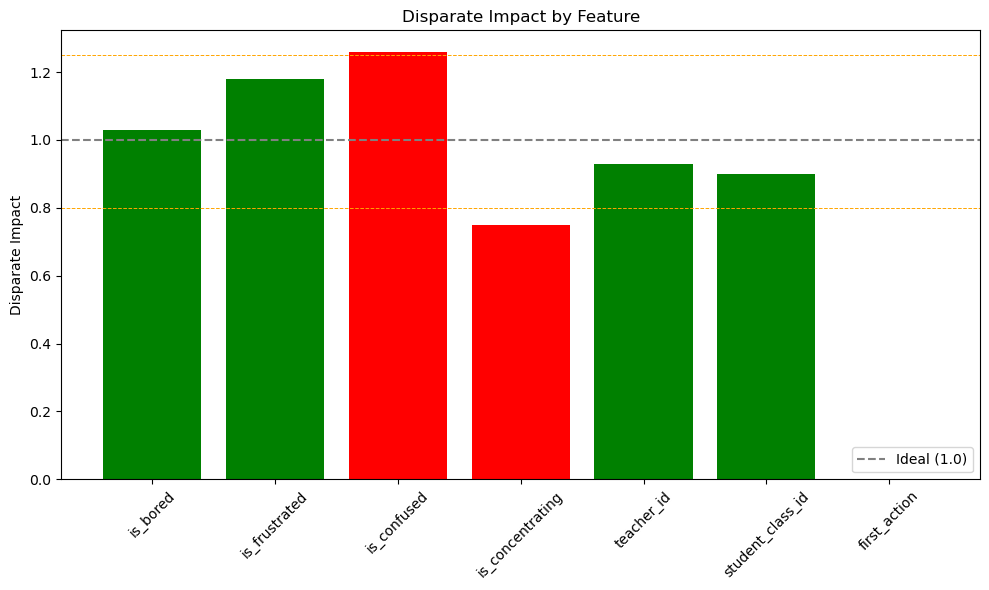

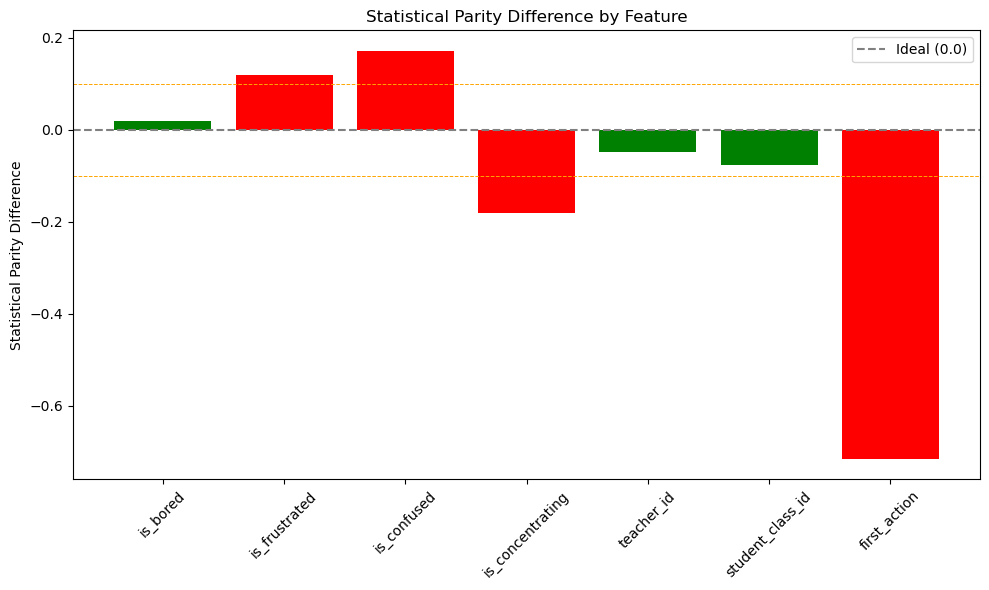

In [218]:
import matplotlib.pyplot as plt
import pandas as pd

# Fairness metrics data
features = [
    'is_bored', 'is_frustrated', 'is_confused', 'is_concentrating',
    'teacher_id', 'student_class_id', 'first_action'
]

disparate_impact = [
    1.03, 1.18, 1.26, 0.75, 0.93, 0.90, 0.0000082
]

stat_parity_diff = [
    0.020, 0.120, 0.172, -0.180, -0.049, -0.076, -0.715
]

# Create DataFrame
fairness_df = pd.DataFrame({
    'Feature': features,
    'Disparate Impact': disparate_impact,
    'Statistical Parity Difference': stat_parity_diff
})

# Determine color coding for Disparate Impact
colors_di = ['green' if 0.8 <= val <= 1.25 else 'red' for val in disparate_impact]
colors_spd = ['green' if -0.1 <= val <= 0.1 else 'red' for val in stat_parity_diff]

# 📊 Plot 1: Disparate Impact
plt.figure(figsize=(10, 6))
plt.bar(fairness_df['Feature'], fairness_df['Disparate Impact'], color=colors_di)
plt.axhline(y=1.0, color='gray', linestyle='--', label='Ideal (1.0)')
plt.axhline(y=0.8, color='orange', linestyle='--', linewidth=0.7)
plt.axhline(y=1.25, color='orange', linestyle='--', linewidth=0.7)
plt.title('Disparate Impact by Feature')
plt.ylabel('Disparate Impact')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 📊 Plot 2: Statistical Parity Difference
plt.figure(figsize=(10, 6))
plt.bar(fairness_df['Feature'], fairness_df['Statistical Parity Difference'], color=colors_spd)
plt.axhline(y=0.0, color='gray', linestyle='--', label='Ideal (0.0)')
plt.axhline(y=0.1, color='orange', linestyle='--', linewidth=0.7)
plt.axhline(y=-0.1, color='orange', linestyle='--', linewidth=0.7)
plt.title('Statistical Parity Difference by Feature')
plt.ylabel('Statistical Parity Difference')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 📊 Graph Explanation: Fairness Metrics Visualization

The bar charts below visualize the two main fairness metrics calculated using AIF360:

1. **Disparate Impact**  
   - Measures the ratio of favorable outcomes between unprivileged and privileged groups.  
   - Ideal value = **1.0** (fairness line shown in gray)  
   - Acceptable range = **0.8 to 1.25** (boundaries shown in orange)  
   - Bars outside this range are marked **red** and indicate potential bias.

2. **Statistical Parity Difference**  
   - Measures the difference in favorable outcome rates between groups.  
   - Ideal value = **0.0** (fairness line shown in gray)  
   - Acceptable range = **-0.1 to +0.1**  
   - Values beyond this range indicate significant disparity and are marked **red**.

Together, these graphs provide a quick and intuitive way to identify which features may be contributing to bias in the dataset.

## 📌 Final Summary: Bias Detection on the Full Dataset (`df_full_cleaned`)

This section summarizes the complete process undertaken to detect and understand potential biases in the full educational dataset (~6.1 million rows). Our goal was to identify whether certain groups of students — based on emotion, behavior, or system-defined metadata — are systematically treated unfairly by the learning platform. Here's what we did and why it matters:

---

### 🧼 1. Data Preparation & Cleaning

- Created a working copy of the full dataset as `df_full_cleaned`.
- Dropped irrelevant columns such as timestamps, text logs, and metadata that don’t contribute to fairness evaluation.
- Dropped the `skill` column due to >3M missing values. This allowed us to retain the full dataset without row filtering and improved the reliability of our results.
- Renamed long or technical columns (e.g., `Average_confidence(FRUSTRATED)` → `conf_frustrated`) for readability and consistency.

---

### 🔁 2. Feature Engineering

- **Binarized the `correct` column**:  
  Converted partial correctness values (e.g., 0.5, 0.75) into binary values — `1.0` for fully correct and `0.0` for all else — to simplify analysis.
  
- **Created binary emotional indicators** using a threshold of 0.6:  
  - `is_frustrated`, `is_confused`, `is_concentrating`, `is_bored`
  - These were derived from predicted confidence scores and represent high or low emotional states.

---

### ⚖️ 3. Fairness Evaluation (AIF360)

We applied IBM’s AIF360 toolkit to calculate two key fairness metrics for various protected attributes:

- **Disparate Impact (DI)** — Measures the ratio of positive outcomes between unprivileged and privileged groups. Ideal = 1.0.
- **Statistical Parity Difference (SPD)** — Measures the absolute difference in positive outcome rates between groups. Ideal = 0.0.

We tested the following attributes:

| Feature              | Disparate Impact | SPD       | Interpretation |
|----------------------|------------------|-----------|----------------|
| `is_bored`           | 1.03             | +0.02     | No significant bias. |
| `is_frustrated`      | 1.18             | +0.12     | Slight advantage for frustrated students. |
| `is_confused`        | 1.26             | +0.17     | Confused students receive more support or better outcomes. |
| `is_concentrating`   | 0.75             | -0.18     | Clear disadvantage for students with low concentration. |
| `teacher_id`         | 0.93             | -0.05     | Mostly fair outcomes across teachers. |
| `student_class_id`   | 0.90             | -0.08     | Slight variation in outcomes across classes. |
| `first_action`       | **0.0000082**    | **-0.72** | Major bias against help-seeking students. |

---

### 📈 4. Visualization

- Created two bar charts:
  - **Disparate Impact by Feature**
  - **Statistical Parity Difference by Feature**
- Used color-coded bars to indicate acceptable vs. biased metrics.
- Included threshold lines (0.8–1.25 for DI, -0.1 to +0.1 for SPD) to visually flag unfairness.

---

### 🧠 What We Achieved

- Identified **behavioral and emotional biases** in the dataset, even though traditional demographic features were missing.
- Demonstrated that **help-seeking students** (those who ask for hints first) are **severely disadvantaged**, raising concerns for ethical adaptive systems.
- Found that students with **low concentration** also perform significantly worse — this could reflect platform design that does not effectively support distracted learners.
- Validated that other features like `teacher_id`, `boredom`, and `class_id` have **mostly fair treatment**, supporting confidence in parts of the dataset.

---

### 📌 Why This Matters

These findings directly impact any **model trained on this data**:

- If a model is trained on this biased data **without debiasing**, it may **learn to penalize help-seeking or distracted students**, reinforcing inequality.
- This can result in **unfair recommendations**, **unequal grading**, or **biased content delivery**, especially in adaptive learning platforms.
- Fairness checks like these are essential to ensure **trustworthy, ethical AI** in education.

---

✅ Our work highlights the importance of evaluating fairness **beyond demographics**, especially in **behavior-rich datasets** like this one.